### Разведывательный анализ данных

Задание:
Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 


Порядок выполнения задания:

- Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
- Посмотрите на распределение признака для числовых переменных, устраните выбросы.
- Оцените количество уникальных значений для номинативных переменных.
- По необходимости преобразуйте данные
- Проведите корреляционный анализ количественных переменных
- Отберите не коррелирующие переменные.
- Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
- Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

import matplotlib
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [2]:
stud = pd.read_csv('stud_math.csv')
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

### Описание датасета:

- 1 school — аббревиатура школы, в которой учится ученик

- 2 sex — пол ученика ('F' - женский, 'M' - мужской)

- 3 age — возраст ученика (от 15 до 22)

- 4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

- 5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

- 6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

- 7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

- 8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

- 9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

- 10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

- 11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

- 12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

- 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

- 14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

- 15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

- 16 schoolsup — дополнительная образовательная поддержка (yes или no)

- 17 famsup — семейная образовательная поддержка (yes или no)

- 18 paid — дополнительные платные занятия по математике (yes или no)

- 19 activities — дополнительные внеучебные занятия (yes или no)

- 20 nursery — посещал детский сад (yes или no)

- 21 higher — хочет получить высшее образование (yes или no)

- 22 internet — наличие интернета дома (yes или no)

- 23 romantic — в романтических отношениях (yes или no)

- 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

- 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

- 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

- 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

- 28 absences — количество пропущенных занятий

- 29 score — баллы по госэкзамену по математике

In [3]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [4]:
stud.columns = ['school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu', 'f_edu',
                'm_job', 'f_job', 'reason', 'guardian', 'traveltime', 'studytime',
                'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                'studytime_g', 'higher', 'internet', 'romantic', 'fam_rel',
                'freetime', 'go_out', 'health', 'absences', 'score']

## Обработка и очистка таблицы
### Отсутствующие данные

In [5]:
display(stud.head(10))
stud.info()

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_g,higher,internet,romantic,fam_rel,freetime,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          395 non-null    int64  
 3   address      378 non-null    object 
 4   fam_size     368 non-null    object 
 5   p_status     350 non-null    object 
 6   m_edu        392 non-null    float64
 7   f_edu        371 non-null    float64
 8   m_job        376 non-null    object 
 9   f_job        359 non-null    object 
 10  reason       378 non-null    object 
 11  guardian     364 non-null    object 
 12  traveltime   367 non-null    float64
 13  studytime    388 non-null    float64
 14  failures     373 non-null    float64
 15  schoolsup    386 non-null    object 
 16  famsup       356 non-null    object 
 17  paid         355 non-null    object 
 18  activities   381 non-null    object 
 19  nursery 

In [6]:
# отбор числовых колонок

stud_numeric = stud.select_dtypes(include=[np.number])
numeric_cols = stud_numeric.columns.values
print(numeric_cols)

['age' 'm_edu' 'f_edu' 'traveltime' 'studytime' 'failures' 'studytime_g'
 'fam_rel' 'freetime' 'go_out' 'health' 'absences' 'score']


In [7]:
# отбор категориальных колонок

stud_non_numeric = stud.select_dtypes(exclude=[np.number])
non_numeric_cols = stud_non_numeric.columns.values
print(non_numeric_cols)

['school' 'sex' 'address' 'fam_size' 'p_status' 'm_job' 'f_job' 'reason'
 'guardian' 'schoolsup' 'famsup' 'paid' 'activities' 'nursery' 'higher'
 'internet' 'romantic']


In [8]:
# Процентный список пропущенных данных

for col in stud.columns:
    pct_missing = np.mean(stud[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

school - 0.0%
sex - 0.0%
age - 0.0%
address - 4.0%
fam_size - 7.0%
p_status - 11.0%
m_edu - 1.0%
f_edu - 6.0%
m_job - 5.0%
f_job - 9.0%
reason - 4.0%
guardian - 8.0%
traveltime - 7.0%
studytime - 2.0%
failures - 6.0%
schoolsup - 2.0%
famsup - 10.0%
paid - 10.0%
activities - 4.0%
nursery - 4.0%
studytime_g - 2.0%
higher - 5.0%
internet - 9.0%
romantic - 8.0%
fam_rel - 7.0%
freetime - 3.0%
go_out - 2.0%
health - 4.0%
absences - 3.0%
score - 2.0%


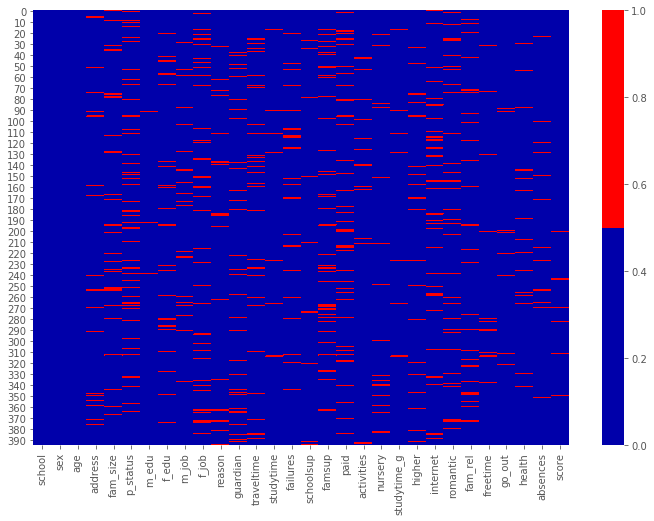

In [9]:
# Тепловая карта пропусков

cols = stud.columns
# определяем цвета
# красный - пропущенные данные, синий - не пропущенные
colours = ['#0000aa', '#ff0000']
sns.heatmap(stud[cols].isnull(), cmap=sns.color_palette(colours))

created missing indicator for: address
created missing indicator for: fam_size
created missing indicator for: p_status
created missing indicator for: m_edu
created missing indicator for: f_edu
created missing indicator for: m_job
created missing indicator for: f_job
created missing indicator for: reason
created missing indicator for: guardian
created missing indicator for: traveltime
created missing indicator for: studytime
created missing indicator for: failures
created missing indicator for: schoolsup
created missing indicator for: famsup
created missing indicator for: paid
created missing indicator for: activities
created missing indicator for: nursery
created missing indicator for: studytime_g
created missing indicator for: higher
created missing indicator for: internet
created missing indicator for: romantic
created missing indicator for: fam_rel
created missing indicator for: freetime
created missing indicator for: go_out
created missing indicator for: health
created missing indi

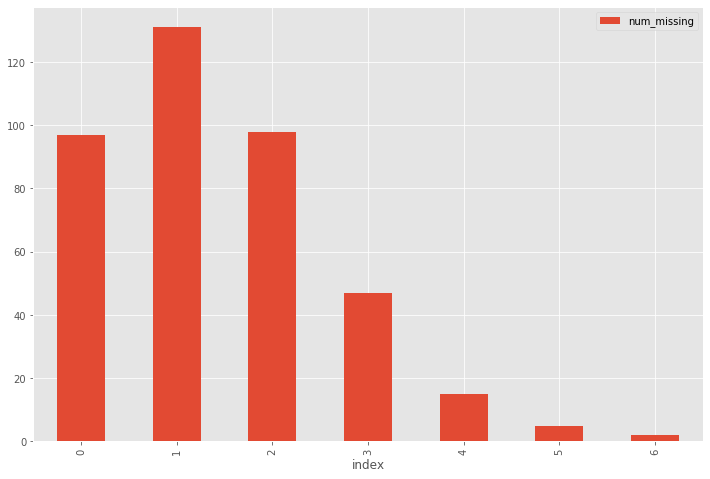

In [10]:
# гистограмма пропущенных данных

for col in stud.columns:
    missing = stud[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        stud['{}_ismissing'.format(col)] = missing

# затем на основе индикатора строим гистограмму

ismissing_cols = [col for col in stud.columns if 'ismissing' in col]
stud['num_missing'] = stud[ismissing_cols].sum(axis=1)

stud['num_missing'].value_counts().reset_index().sort_values(
    by='index').plot.bar(x='index', y='num_missing')

In [11]:
# Оставим эталонную таблицу в которой нет пропущенных значений в строке.
# отбрасываем строки с большим количеством пропусков

ind_missing = stud[stud['num_missing'] > 4].index
stud = stud.drop(ind_missing, axis=0)
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 58 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   school                 388 non-null    object 
 1   sex                    388 non-null    object 
 2   age                    388 non-null    int64  
 3   address                371 non-null    object 
 4   fam_size               364 non-null    object 
 5   p_status               349 non-null    object 
 6   m_edu                  385 non-null    float64
 7   f_edu                  365 non-null    float64
 8   m_job                  371 non-null    object 
 9   f_job                  353 non-null    object 
 10  reason                 372 non-null    object 
 11  guardian               357 non-null    object 
 12  traveltime             362 non-null    float64
 13  studytime              384 non-null    float64
 14  failures               369 non-null    float64
 15  school

In [12]:
# удаляем признаки для гистграммы пропущенных значений

for col in stud.columns:
    if 'missing' in col:
        del stud[col]
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 394
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       388 non-null    object 
 1   sex          388 non-null    object 
 2   age          388 non-null    int64  
 3   address      371 non-null    object 
 4   fam_size     364 non-null    object 
 5   p_status     349 non-null    object 
 6   m_edu        385 non-null    float64
 7   f_edu        365 non-null    float64
 8   m_job        371 non-null    object 
 9   f_job        353 non-null    object 
 10  reason       372 non-null    object 
 11  guardian     357 non-null    object 
 12  traveltime   362 non-null    float64
 13  studytime    384 non-null    float64
 14  failures     369 non-null    float64
 15  schoolsup    379 non-null    object 
 16  famsup       351 non-null    object 
 17  paid         349 non-null    object 
 18  activities   375 non-null    object 
 19  nursery 

### score 
баллы по госэкзамену по математике. Главный столбец относительно которого мы исследуем влияние остальных критериев (признаков)

In [13]:
#Посмотрим содержимое столбца.

pd.DataFrame(stud.score.value_counts(dropna=False))

,score
50.0,52
55.0,45
0.0,37
75.0,33
40.0,30
60.0,30
65.0,29
45.0,27
70.0,27
80.0,16


In [14]:
median_score = stud.score.median()
median_score

55.0

In [15]:
#stud.address = stud.address.astype(str).apply(fix_cat)
stud['score'].fillna(median_score, inplace=True)

In [16]:
pd.DataFrame(stud.score.value_counts(dropna=False))

,score
50.0,52
55.0,51
0.0,37
75.0,33
40.0,30
60.0,30
65.0,29
70.0,27
45.0,27
80.0,16


count    388.000000
mean      52.255155
std       22.920024
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

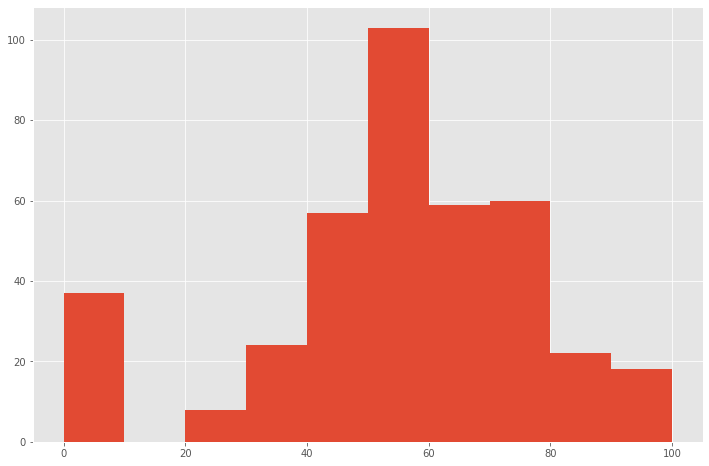

In [17]:
stud.score.hist()
stud.score.describe()

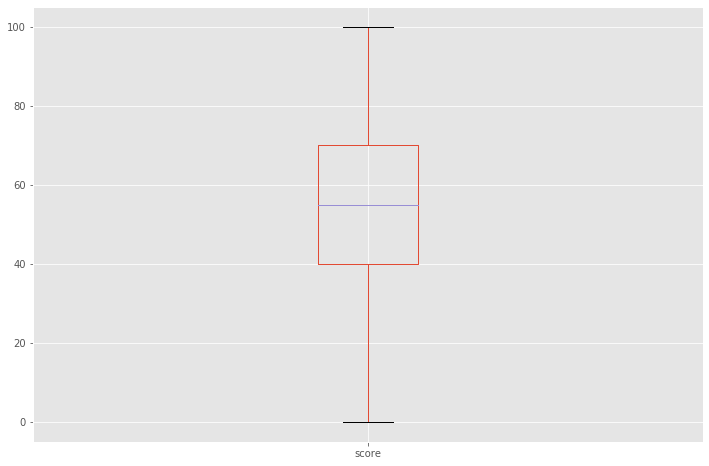

In [18]:
# уточняем на наличие выбросов

boxplot = stud.boxplot(column=['score'])

25й 40.0 75й 70.0 медиана= 55.0 IQR= 30.0 Разброс от 10.0 до 100.0


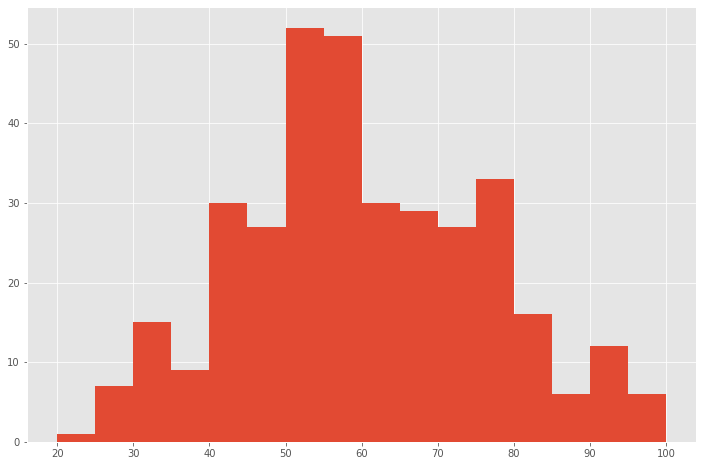

In [19]:
IQR_score = stud.score.quantile(0.75) - stud.score.quantile(0.25)
print('25й', stud.score.quantile(0.25), '75й', stud.score.quantile(0.75), 'медиана=', median_score, 'IQR=',
      IQR_score, 'Разброс от', median_score - 1.5*IQR_score, 'до', median_score + 1.5*IQR_score)
stud.score.loc[stud.score.between(
    median_score - 1.5*IQR_score, median_score + 1.5*IQR_score)].hist(bins=16, label='IQR')

In [20]:
stud = stud.loc[stud.score.between(
    median_score - 1.5*IQR_score, median_score + 1.5*IQR_score)]

### School
аббревиатура школы, в которой учится ученик

In [21]:
#Посмотрим, сколько школ содержит наш датасет.

pd.DataFrame(stud.school.value_counts(dropna=False))

,school
GP,309
MS,42


In [22]:
round(stud.school.value_counts(' ')*100, 1)

GP    88.0
MS    12.0
Name: school, dtype: float64

### Sex

In [23]:
# смотрим содержимое столбца

pd.DataFrame(stud.sex.value_counts(dropna=False))

,sex
F,183
M,168


In [24]:
round(stud.sex.value_counts(' ')*100, 1)

F    52.1
M    47.9
Name: sex, dtype: float64

Более половины (52.8%) учеников это девочки.

### Age

In [25]:
# смотрим содержимое столбца 

pd.DataFrame(stud.age.value_counts(dropna=False))

,age
16,96
17,87
15,75
18,70
19,18
20,3
22,1
21,1


Пропущенных значений нет, но возможно есть выбросы

count    351.000000
mean      16.652422
std        1.268965
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

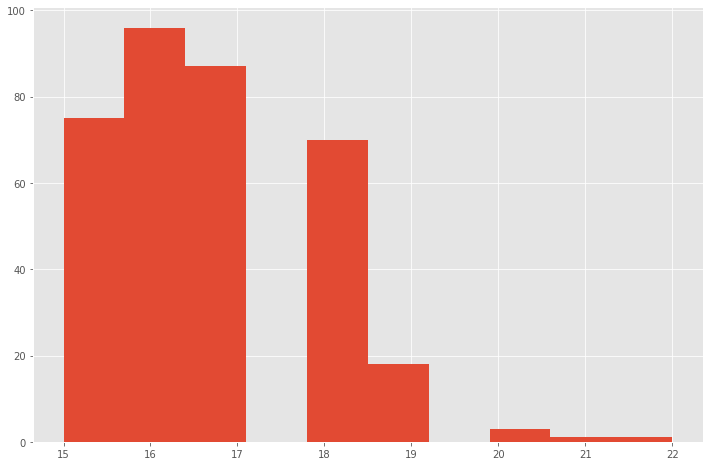

In [26]:
stud.age.hist()
stud.age.describe()

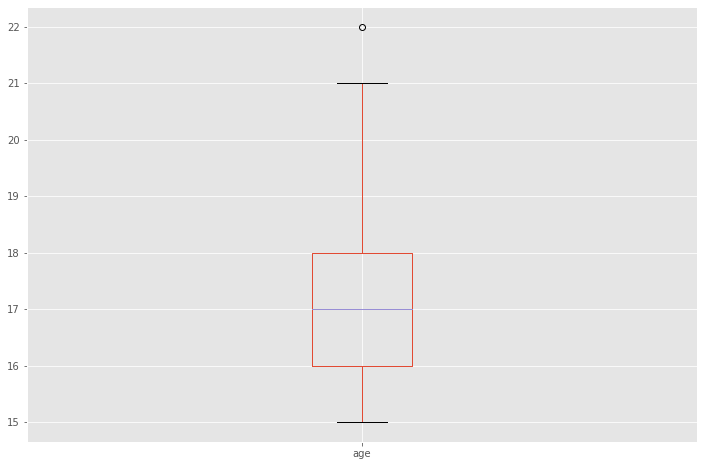

In [27]:
boxplot = stud.boxplot(column=['age'])

# присутствуют выбросы

In [28]:
# очистка от выбросов столбца age

median_age = stud.age.median()
IQR_age = stud.age.quantile(0.75) - stud.age.quantile(0.25)
stud = stud.loc[stud.age.between(
    median_age - 1.5*IQR_age, median_age + 1.5*IQR_age)]
pd.DataFrame(stud.age.value_counts(dropna=False))

,age
16,96
17,87
15,75
18,70
19,18
20,3


In [29]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 0 to 394
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       349 non-null    object 
 1   sex          349 non-null    object 
 2   age          349 non-null    int64  
 3   address      333 non-null    object 
 4   fam_size     328 non-null    object 
 5   p_status     314 non-null    object 
 6   m_edu        347 non-null    float64
 7   f_edu        329 non-null    float64
 8   m_job        334 non-null    object 
 9   f_job        318 non-null    object 
 10  reason       335 non-null    object 
 11  guardian     321 non-null    object 
 12  traveltime   328 non-null    float64
 13  studytime    345 non-null    float64
 14  failures     332 non-null    float64
 15  schoolsup    341 non-null    object 
 16  famsup       314 non-null    object 
 17  paid         313 non-null    object 
 18  activities   338 non-null    object 
 19  nursery 

### address
тип адреса ученика ('U' - городской, 'R' - за городом)

Из предыдущего анализа в этом столбце у нас есть 4% пропущенных значений

In [30]:
# смотрим содержимое столбца 

pd.DataFrame(stud.address.value_counts(dropna=False))

,address
U,261
R,72
NaN,16


In [31]:
stud.address.fillna('None', inplace=True)

Большая часть учеников (76.1%) проживает в городе. 23.9% проживает за городом.

In [32]:
# поменяем символьные значения на цифровые метки

stud['address'] = stud['address'].replace(['U', 'R', 'None'], [1, 2, 0])

In [33]:
stud.address.value_counts(dropna=False)

1    261
2     72
0     16
Name: address, dtype: int64

### fam_size
размер семьи('LE3' <= 3, 'GT3' >3)

Из предыдущего анализа в этом столбце у нас есть 7% пропущенных значений

In [34]:
# смотрим содержимое

pd.DataFrame(stud.fam_size.value_counts(dropna=False))

,fam_size
GT3,230
LE3,98
NaN,21


In [35]:
stud.fam_size.fillna('GT3', inplace=True)

In [36]:
# считаем процентное соотношение

round(stud.fam_size.value_counts(' ')*100, 0)

GT3    72.0
LE3    28.0
Name: fam_size, dtype: float64

Большинство семей (67%) в выборке многодетные (от 4х детей), а 33% семей имеют до 3х детей.

### Pstatus
статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно).

In [37]:
# смотрим содержимое

pd.DataFrame(stud.p_status.value_counts(dropna=False))

,p_status
T,281
NaN,35
A,33


In [38]:
stud.p_status.fillna('None', inplace=True)

In [39]:
# считаем процентное соотношение

round(stud.p_status.value_counts(' ')*100, 1)

T       80.5
None    10.0
A        9.5
Name: p_status, dtype: float64

У 80.8% учеников родители проживают совместно, а у 10.1% - раздельно.

### Medu 
образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [40]:
# смотрим содержимое

pd.DataFrame(stud.m_edu.value_counts(dropna=False))

,m_edu
4.0,123
2.0,88
3.0,84
1.0,49
0.0,3
NaN,2


In [41]:
median_m = int(stud.m_edu.median())
median_m

3

In [42]:
stud.m_edu.fillna(median_m, inplace=True)

In [43]:
# считаем процентное соотношение

round(stud.m_edu.value_counts(' ')*100, 1)

4.0    35.2
2.0    25.2
3.0    24.6
1.0    14.0
0.0     0.9
Name: m_edu, dtype: float64

Выбросов в выборке нет. У 33.4% учеников мамы имеют высшее образование. 15% мам закончили 4 класса, а 24.9% мам закончили 9 классов. 25.9% мам имеют законченную среднюю школу, либо среднеспециальное образование. При этом у почти 1% учеников мамы вообще не имеют образования.

### Fedu 
образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [44]:
# смотрим содержимое

pd.DataFrame(stud.f_edu.value_counts(dropna=False))

,f_edu
2.0,92
3.0,89
4.0,80
1.0,65
NaN,20
0.0,2
40.0,1


In [45]:
median_f = int(stud.f_edu.median())
median_f

3

In [46]:
stud.f_edu.fillna(median_f, inplace=True)

In [47]:
# здравый смысл

stud = stud.loc[stud.f_edu.between(0, 5)]

In [48]:
# смотрим процентное соотношение

round(stud.f_edu.value_counts(' ')*100, 1)

3.0    31.3
2.0    26.4
4.0    23.0
1.0    18.7
0.0     0.6
Name: f_edu, dtype: float64

У 22.9% учеников папы имеют высшее образование. 19.5% пап закончили 4 класса, а 26.8% пап закончили 9 классов. 30.4% пап имеют законченную среднюю школу, либо среднеспециальное образование.

### Mjob
работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [49]:
# смотрим содержимое столбца

pd.DataFrame(stud.m_job.value_counts(dropna=False))

,m_job
other,120
services,84
teacher,51
at_home,48
health,30
NaN,15


In [50]:
stud.m_job.fillna('other', inplace=True)

In [51]:
# сторим процентное соотношение

round(stud.m_job.value_counts(' ')*100, 1)

other       38.8
services    24.1
teacher     14.7
at_home     13.8
health       8.6
Name: m_job, dtype: float64

14.8% мам работает учителями, 8.3% в сфере здравоохранения, 23.9% мам на госслужбе, 14.8% - домохозяйки, 38.7% - занимается чем-то другим

### Fjob 
работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [52]:
# смотрим содержимое столбца

pd.DataFrame(stud.f_job.value_counts(dropna=False))

,f_job
other,172
services,90
NaN,31
teacher,26
health,15
at_home,14


In [53]:
stud.f_job.fillna('other', inplace=True)

In [54]:
# сторим процентное соотношение

round(stud.f_job.value_counts(' ')*100, 1)

other       58.3
services    25.9
teacher      7.5
health       4.3
at_home      4.0
Name: f_job, dtype: float64

7.5% пап работает учителями, 3.9% в сфере здравоохранения, 26% пап на госслужбе, 4.2% - не работает, 58.4% - занимается чем-то другим

### reason
причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [55]:
# смотрим содержимое столбца

pd.DataFrame(stud.reason.value_counts(dropna=False))

,reason
course,120
reputation,93
home,91
other,30
NaN,14


In [56]:
stud.reason.fillna('other', inplace=True)

In [57]:
# сторим процентное соотношение

round(stud.reason.value_counts(' ')*100, 1)

course        34.5
reputation    26.7
home          26.1
other         12.6
Name: reason, dtype: float64

Ключевыми признаками выбора школы являлись:  программа (35.3%), близость к дому (26.8%) и репутация (25.7%)

### guardian 
опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [58]:
# смотрим содержимое столбца

pd.DataFrame(stud.guardian.value_counts(dropna=False))

,guardian
mother,222
father,75
NaN,28
other,23


In [59]:
stud.guardian.fillna('other', inplace=True)

In [60]:
# сторим процентное соотношение

round(stud.guardian.value_counts(' ')*100, 1)

mother    63.8
father    21.6
other     14.7
Name: guardian, dtype: float64

Большая часть опекунов являются матери (63.6%). Значение столбца не вполне понятно, очевидно, это тот кто каждый день занимается с ребенком по вопросам обучения. Неточности перевода и культурные различия.

### traveltime 
время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [61]:
# смотрим содержимое столбца

pd.DataFrame(stud.traveltime.value_counts(dropna=False))

,traveltime
1.0,217
2.0,86
NaN,21
3.0,17
4.0,7


In [62]:
median_tr = int(stud.traveltime.median())

In [63]:
stud.traveltime.fillna(median_tr, inplace=True)

In [64]:
# сторим процентное соотношение

round(stud.traveltime.value_counts(' ')*100, 1)

1.0    68.4
2.0    24.7
3.0     4.9
4.0     2.0
Name: traveltime, dtype: float64

Подавляющее большинство детей добирается до школы менее, чем за 15 минут (68.3%). Следующий интервал (от 15-30 минут) у 24.4% детей. Однако есть дети которые тратят более часа на то, чтобы добраться в школу (1.8%).

### studytime 
время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [65]:
# смотрим содержимое столбца

pd.DataFrame(stud.studytime.value_counts(dropna=False))

,studytime
2.0,176
1.0,86
3.0,58
4.0,24
NaN,4


In [66]:
median_st = int(stud.studytime.median())
stud.studytime.fillna(median_st, inplace=True)

In [67]:
# сторим процентное соотношение

round(stud.studytime.value_counts(' ')*100, 1)

2.0    51.7
1.0    24.7
3.0    16.7
4.0     6.9
Name: studytime, dtype: float64

Половина детей (50.9%) тратит от 2 до 5 часов в неделю на учебу вне школы. При этом менее 2х часов вне школы занимаются 25.7% детей. И 16.4% детей тратят от 5 до 10 часов в неделю на обучение вне школы.

### failures 
количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [68]:
# смотрим содержимое столбца

pd.DataFrame(stud.failures.value_counts(dropna=False))

,failures
0.0,272
1.0,38
NaN,17
2.0,12
3.0,9


In [69]:
median_f = int(stud.failures.median())
stud.failures.fillna(median_f, inplace=True)

In [70]:
# сторим процентное соотношение

round(stud.failures.value_counts(' ')*100, 1)

0.0    83.0
1.0    10.9
2.0     3.4
3.0     2.6
Name: failures, dtype: float64

Большинство детей (80%) не испытывало внеучебных неудач (чтобы это не значило). 20% детей испытвало такие неудачи.

### schoolsup 
дополнительная образовательная поддержка (yes или no)

In [71]:
# смотрим содержимое столбца

pd.DataFrame(stud.schoolsup.value_counts(dropna=False))

,schoolsup
no,291
yes,49
NaN,8


In [72]:
stud.schoolsup.fillna('no', inplace=True)

In [73]:
# сторим процентное соотношение

round(stud.schoolsup.value_counts(' ')*100, 1)

no     85.9
yes    14.1
Name: schoolsup, dtype: float64

Подавляющее большинство детей (87%) не пользовалось дополнительной образовательной поддержкой.

### famsup 
семейная образовательная поддержка (yes или no)

In [74]:
# смотрим содержимое столбца

pd.DataFrame(stud.famsup.value_counts(dropna=False))

,famsup
yes,197
no,116
NaN,35


In [75]:
stud.famsup.fillna('yes', inplace=True)

In [76]:
# сторим процентное соотношение

round(stud.famsup.value_counts(' ')*100, 1)

yes    66.7
no     33.3
Name: famsup, dtype: float64

Больше половины детей (66%) пользовались семейной образовательной поддержкой.

### paid
дополнительные платные занятия по математике (yes или no)

In [77]:
# смотрим содержимое столбца

pd.DataFrame(stud.paid.value_counts(dropna=False))

,paid
no,169
yes,143
NaN,36


In [78]:
stud.paid.fillna('no', inplace=True)

In [79]:
# сторим процентное соотношение

round(stud.paid.value_counts(' ')*100, 1)

no     58.9
yes    41.1
Name: paid, dtype: float64

Более половины детей (61%) не использовали дополнительные платные занятия по математике.

In [80]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 394
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       348 non-null    object 
 1   sex          348 non-null    object 
 2   age          348 non-null    int64  
 3   address      348 non-null    int64  
 4   fam_size     348 non-null    object 
 5   p_status     348 non-null    object 
 6   m_edu        348 non-null    float64
 7   f_edu        348 non-null    float64
 8   m_job        348 non-null    object 
 9   f_job        348 non-null    object 
 10  reason       348 non-null    object 
 11  guardian     348 non-null    object 
 12  traveltime   348 non-null    float64
 13  studytime    348 non-null    float64
 14  failures     348 non-null    float64
 15  schoolsup    348 non-null    object 
 16  famsup       348 non-null    object 
 17  paid         348 non-null    object 
 18  activities   337 non-null    object 
 19  nursery 

### activities

In [81]:
pd.DataFrame(stud.activities.value_counts(dropna=False))

,activities
yes,170
no,167
NaN,11


In [82]:
stud.activities.fillna('yes', inplace=True)

In [83]:
# сторим процентное соотношение

round(stud.activities.value_counts(' ')*100, 1)

yes    52.0
no     48.0
Name: activities, dtype: float64

### nursery 
посещал детский сад (yes или no)

In [84]:
# смотрим содержимое столбца

pd.DataFrame(stud.nursery.value_counts(dropna=False))

,nursery
yes,269
no,66
NaN,13


In [85]:
stud.nursery.fillna('yes', inplace=True)

In [86]:
# сторим процентное соотношение

round(stud.nursery.value_counts(' ')*100, 1)

yes    81.0
no     19.0
Name: nursery, dtype: float64

Подавляющее большинство детей (80.5%) посещало детский сад

### higher 
хочет получить высшее образование (yes или no)

In [87]:
# смотрим содержимое столбца

pd.DataFrame(stud.higher.value_counts(dropna=False))

,higher
yes,319
NaN,17
no,12


In [88]:
stud.higher.fillna('yes', inplace=True)

In [89]:
# сторим процентное соотношение

round(stud.higher.value_counts(' ')*100, 1)

yes    96.6
no      3.4
Name: higher, dtype: float64

Подавляющее количество детей (95.3%) хочет получить высшее образование.

### internet 
наличие интернета дома (yes или no)

In [90]:
# смотрим содержимое столбца

pd.DataFrame(stud.internet.value_counts(dropna=False))

,internet
yes,270
no,49
NaN,29


In [91]:
stud.internet.fillna('yes', inplace=True)

In [92]:
# сторим процентное соотношение

round(stud.internet.value_counts(' ')*100, 1)

yes    85.9
no     14.1
Name: internet, dtype: float64

У значительной части (85.7%) детей есть интернет дома. 

### romantic 
в романтических отношениях (yes или no)

In [93]:
# смотрим содержимое столбца

pd.DataFrame(stud.romantic.value_counts(dropna=False))

,romantic
no,221
yes,102
NaN,25


In [94]:
stud.romantic.fillna('no', inplace=True)

In [95]:
# сторим процентное соотношение

round(stud.romantic.value_counts(' ')*100, 1)

no     70.7
yes    29.3
Name: romantic, dtype: float64

Только одна треть учеников (31.4%) состоит в романтических отношениях.

### famrel 
семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [96]:
# смотрим содержимое столбца

pd.DataFrame(stud.fam_rel.value_counts(dropna=False))

,fam_rel
4.0,165
5.0,83
3.0,55
NaN,24
2.0,14
1.0,6
-1.0,1


In [97]:
stud = stud.loc[stud.fam_rel.between(1,5)]

In [98]:
median_fmr = int(stud.fam_rel.median())
stud.fam_rel.fillna(median_fmr, inplace=True)

In [99]:
# сторим процентное соотношение

round(stud.fam_rel.value_counts(' ')*100, 1)

4.0    51.1
5.0    25.7
3.0    17.0
2.0     4.3
1.0     1.9
Name: fam_rel, dtype: float64

Семейные отношения у полвины детей (50.4%) оцениваются, как хорошие, а у четверти (25.8%) как отличные. Однако есть дети где условия проживания плохие (4.8%) и очень плохие (2.0%).

### freetime 
свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [100]:
# смотрим содержимое столбца

pd.DataFrame(stud.freetime.value_counts(dropna=False))

,freetime
3.0,121
4.0,95
2.0,52
5.0,33
1.0,14
NaN,8


In [101]:
median_ft = int(stud.freetime.median())
stud.freetime.fillna(median_ft, inplace=True)

In [102]:
# смотрим процентное соотношение

round(stud.freetime.value_counts(' ')*100, 1)

3.0    39.9
4.0    29.4
2.0    16.1
5.0    10.2
1.0     4.3
Name: freetime, dtype: float64

### goout 
проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [103]:
# смотрим содержимое столбца

pd.DataFrame(stud.go_out.value_counts(dropna=False))

,go_out
3.0,110
2.0,84
4.0,67
5.0,39
1.0,16
NaN,7


In [104]:
median_g = int(stud.go_out.median())
stud.go_out.fillna(median_g, inplace=True)

In [105]:
# смотрим процентное соотношение

round(stud.go_out.value_counts(' ')*100, 1)

3.0    36.2
2.0    26.0
4.0    20.7
5.0    12.1
1.0     5.0
Name: go_out, dtype: float64

### health 
текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [106]:
# смотрим содержимое столбца

pd.DataFrame(stud.health.value_counts(dropna=False))

,health
5.0,106
3.0,78
4.0,52
1.0,38
2.0,37
NaN,12


In [107]:
median_h = int(stud.health.median())
stud.health.fillna(median_h, inplace=True)

In [108]:
# смотрим процентное соотношение

round(stud.health.value_counts(' ')*100, 1)

5.0    32.8
3.0    24.1
4.0    19.8
1.0    11.8
2.0    11.5
Name: health, dtype: float64

Треть детей (32.8%) имеет отличное здоровье. 20.4% детей имеет хорошее здоровье. 23.8% детей имеет посредственное здоровье.

### absences 
количество пропущенных занятий

In [109]:
# смотрим содержимое столбца

pd.DataFrame(stud.absences.value_counts(dropna=False))

,absences
0.0,67
2.0,56
4.0,51
6.0,27
8.0,21
10.0,14
12.0,12
14.0,10
NaN,10
3.0,7


count    313.000000
mean       7.897764
std       25.435485
min        0.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

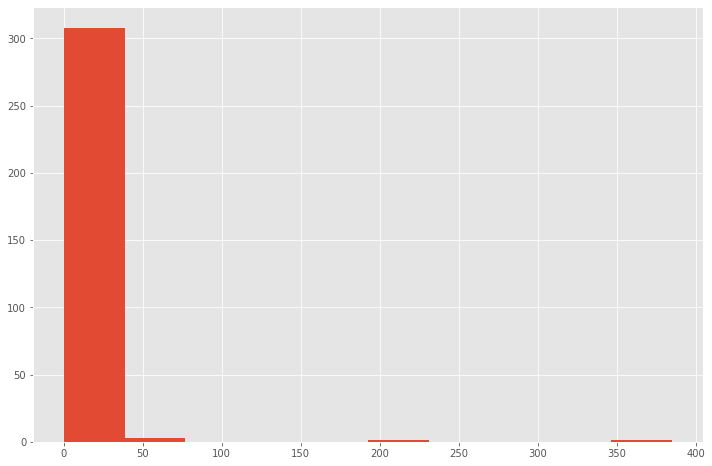

In [110]:
stud.absences.hist()
stud.absences.describe()

Самый простой способ отфильтровать выбросы — воспользоваться формулой интерквартильного расстояния. Напомним, что выбросом считаются такие значения, которые лежат вне рамок [median -1.5IQR : median+1.5IQR], где IQR = percentile(75) - percentile(25).

25й 2.0 75й 8.0 медиана= 4.0 IQR= 6.0 Разброс от -5.0 до 13.0


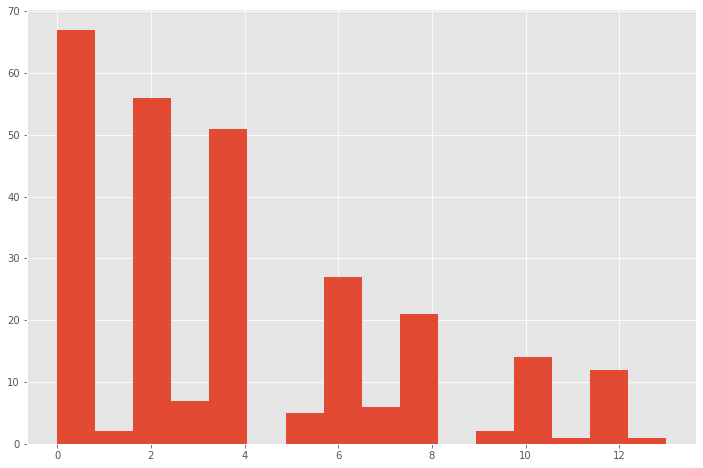

In [111]:
median_absences = stud.absences.median()
IQR_absences = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
print('25й', stud.absences.quantile(0.25), '75й', stud.absences.quantile(0.75), 'медиана=', median_absences, 'IQR=',
      IQR_absences, 'Разброс от', median_absences - 1.5*IQR_absences, 'до', median_absences + 1.5*IQR_absences)
stud.absences.loc[stud.absences.between(
    median_absences - 1.5*IQR_absences, median_absences + 1.5*IQR_absences)].hist(bins=16, label='IQR')

In [112]:
# очищаем таблицу от выбросов

stud = stud.loc[stud.absences.between(
    median_absences - 1.5*IQR_absences, median_absences + 1.5*IQR_absences)]
pd.DataFrame(stud.absences.value_counts(dropna=False))

,absences
0.0,67
2.0,56
4.0,51
6.0,27
8.0,21
10.0,14
12.0,12
3.0,7
7.0,6
5.0,5


### studytime_g

In [113]:
# смотрим содержимое столбца

pd.DataFrame(stud.studytime_g.value_counts(dropna=False))

,studytime_g
-6.0,134
-3.0,65
-9.0,48
-12.0,23
NaN,2


In [114]:
median_g = int(stud.studytime_g.median())
stud.studytime_g.fillna(median_g, inplace=True)

In [115]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272 entries, 0 to 394
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       272 non-null    object 
 1   sex          272 non-null    object 
 2   age          272 non-null    int64  
 3   address      272 non-null    int64  
 4   fam_size     272 non-null    object 
 5   p_status     272 non-null    object 
 6   m_edu        272 non-null    float64
 7   f_edu        272 non-null    float64
 8   m_job        272 non-null    object 
 9   f_job        272 non-null    object 
 10  reason       272 non-null    object 
 11  guardian     272 non-null    object 
 12  traveltime   272 non-null    float64
 13  studytime    272 non-null    float64
 14  failures     272 non-null    float64
 15  schoolsup    272 non-null    object 
 16  famsup       272 non-null    object 
 17  paid         272 non-null    object 
 18  activities   272 non-null    object 
 19  nursery 

### Корреляционный анализ
Выясним, какие столбцы коррелируют с оценкой за экзамен. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.

Корреляции рассмотрим только для числовых столбцов.

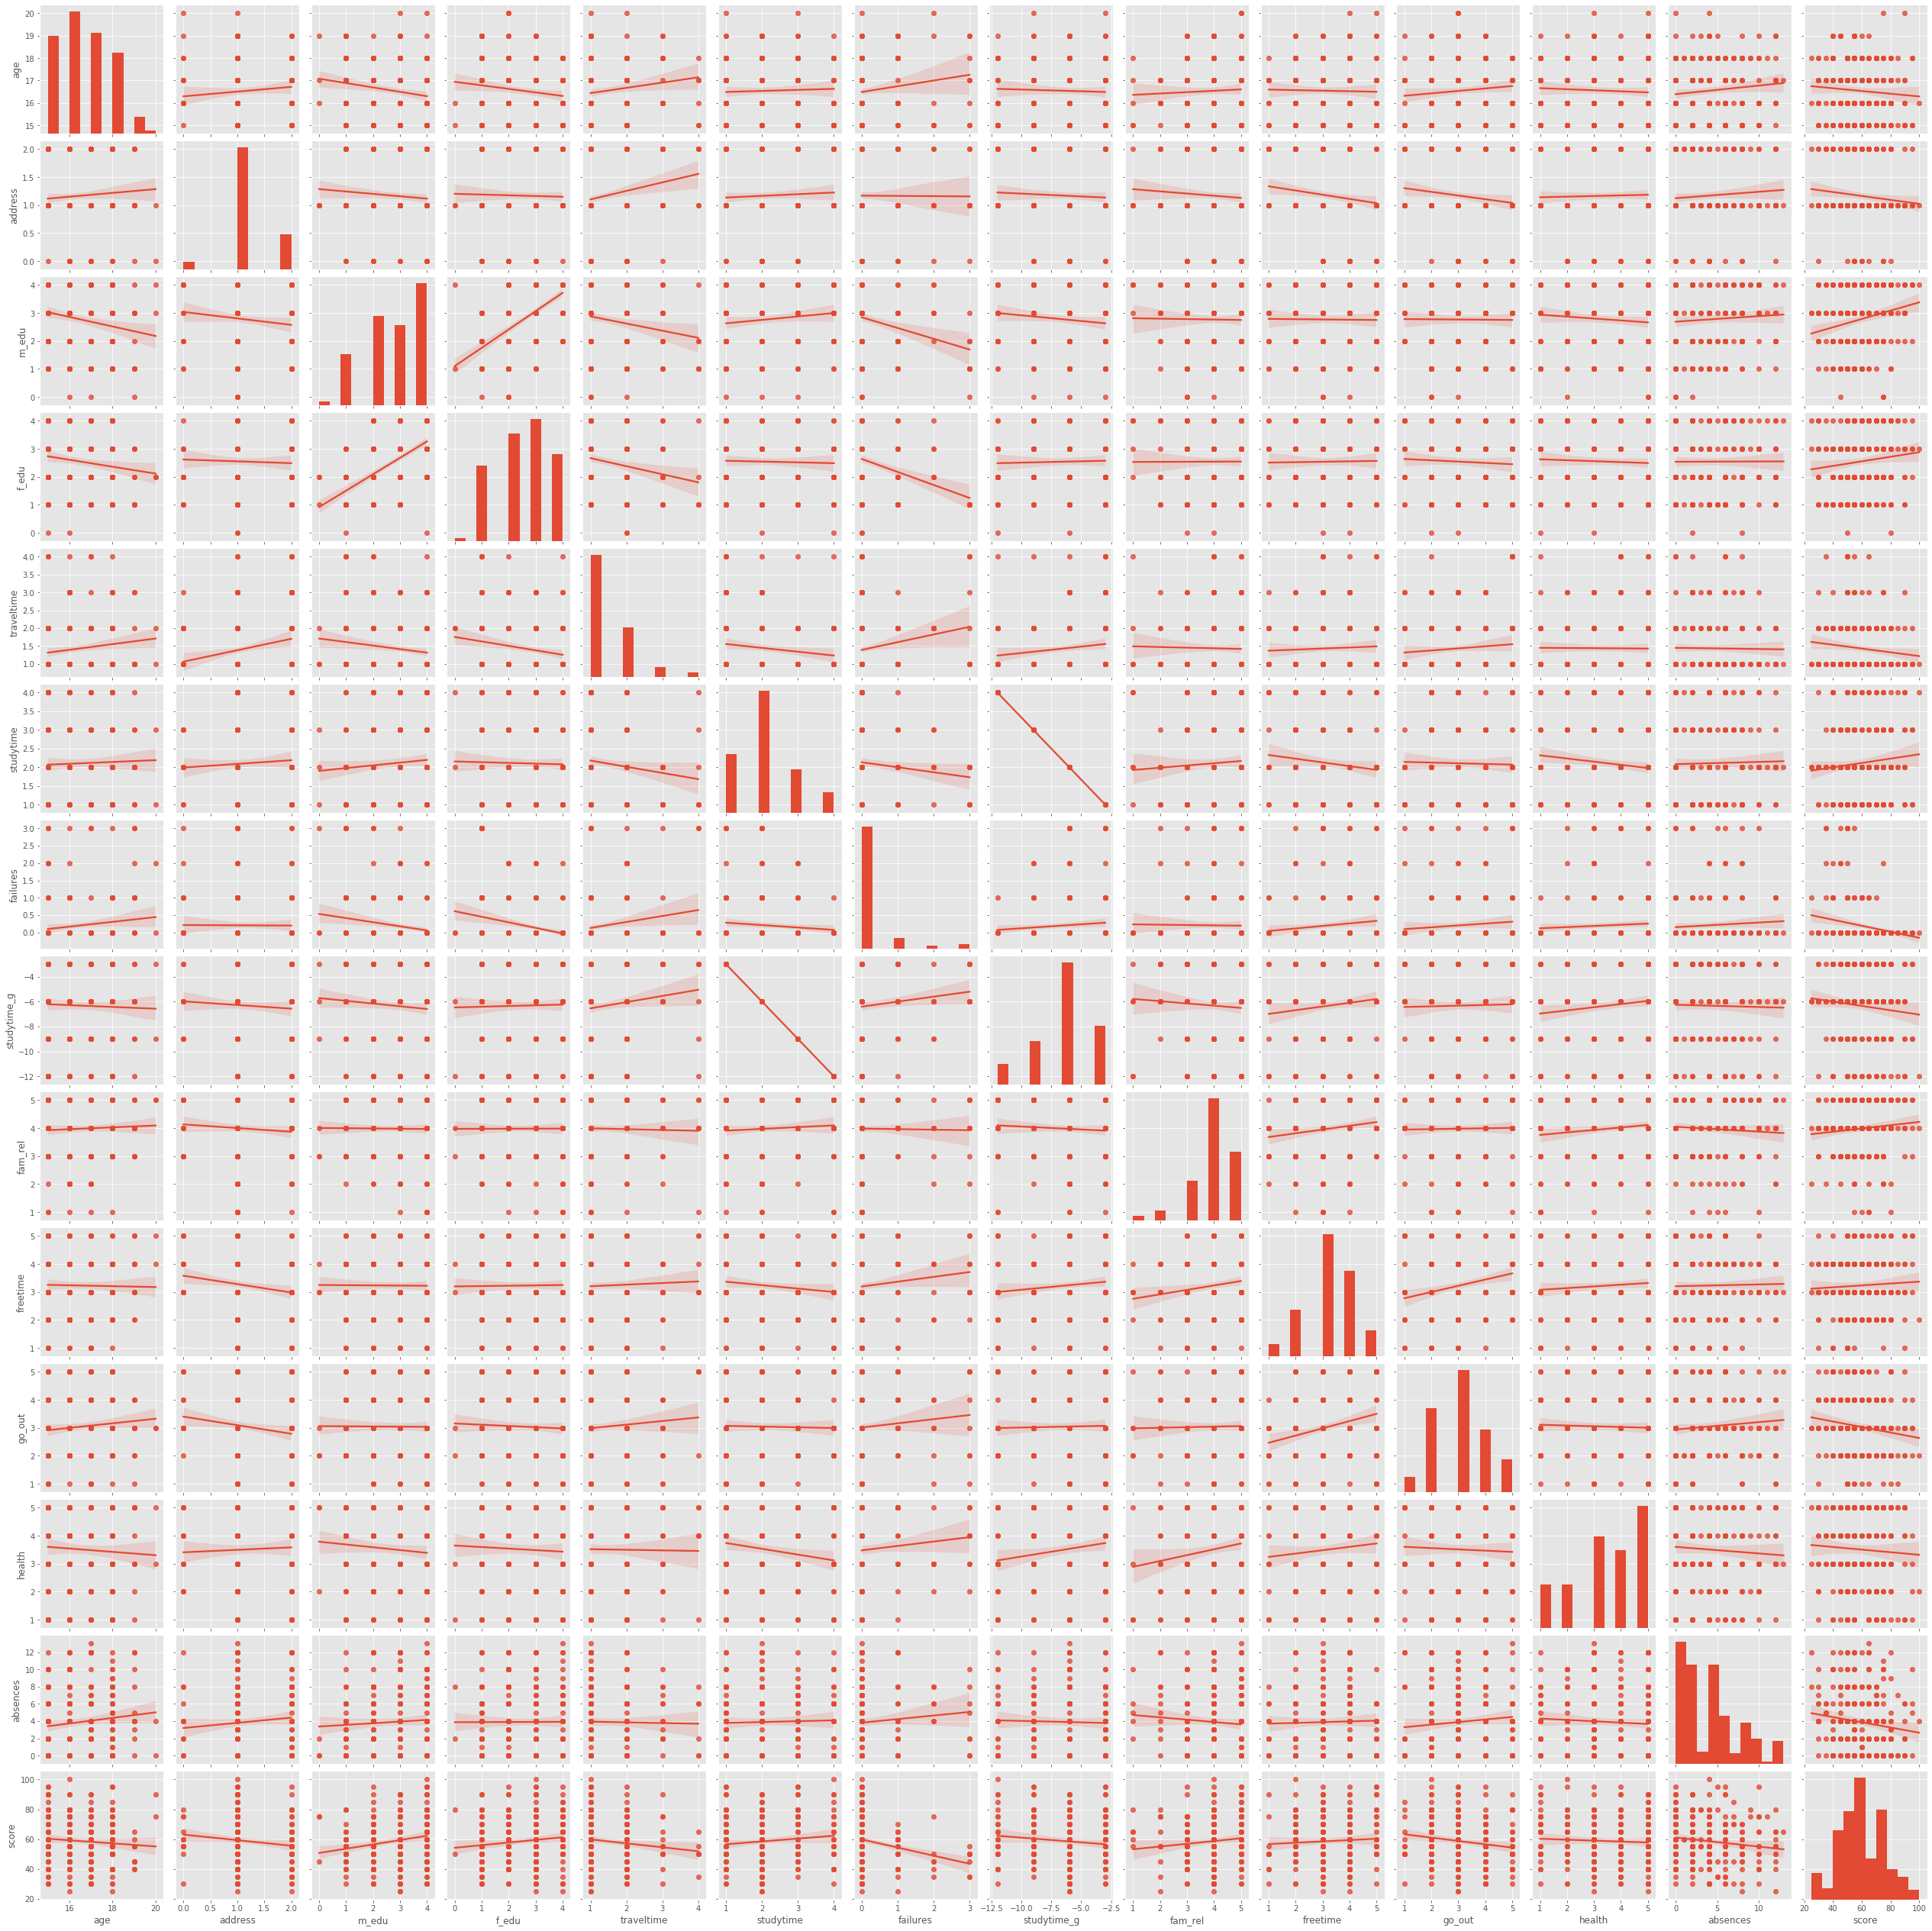

In [116]:
sns.pairplot(stud, kind = 'reg')

Используем для наглядности матрицу корреляций:

In [117]:
stud.corr()

,age,address,m_edu,f_edu,traveltime,studytime,failures,studytime_g,fam_rel,freetime,go_out,health,absences,score
age,1.000000,0.084616,-0.182114,-0.139921,0.136227,0.033343,0.132868,-0.033343,0.044641,-0.019492,0.094090,-0.052951,0.111023,-0.079499
address,0.084616,1.000000,-0.098862,-0.029324,0.220195,0.054384,-0.005837,-0.054384,-0.071523,-0.150048,-0.141793,0.031394,0.082863,-0.114244
m_edu,-0.182114,-0.098862,1.000000,0.618727,-0.158848,0.094558,-0.212893,-0.094558,-0.011878,-0.008306,-0.007095,-0.082850,0.061736,0.206709
f_edu,-0.139921,-0.029324,0.618727,1.000000,-0.189377,-0.023348,-0.272222,0.023348,0.002862,0.013551,-0.045648,-0.043045,0.003157,0.120006
traveltime,0.136227,0.220195,-0.158848,-0.189377,1.000000,-0.133383,0.192377,0.133383,-0.023052,0.041239,0.086036,-0.011081,-0.016229,-0.118356
studytime,0.033343,0.054384,0.094558,-0.023348,-0.133383,1.000000,-0.096192,-1.000000,0.061024,-0.110366,-0.021838,-0.132690,0.024320,0.105050
failures,0.132868,-0.005837,-0.212893,-0.272222,0.192377,-0.096192,1.000000,0.096192,-0.013339,0.111918,0.089301,0.072262,0.074133,-0.216948
studytime_g,-0.033343,-0.054384,-0.094558,0.023348,0.133383,-1.000000,0.096192,1.000000,-0.061024,0.110366,0.021838,0.132690,-0.024320,-0.105050
fam_rel,0.044641,-0.071523,-0.011878,0.002862,-0.023052,0.061024,-0.013339,-0.061024,1.000000,0.145556,0.017163,0.135861,-0.068296,0.103612
freetime,-0.019492,-0.150048,-0.008306,0.013551,0.041239,-0.110366,0.111918,0.110366,0.145556,1.000000,0.239491,0.085259,0.023312,0.054763


Самые слабоскоррелированные с показателем score переменные:
- age, чем меньше возраст, тем выше балл;
- studytime, чем больше время, тем выше балл;
- health — чем лучше здоровье, тем ниже балл;
- famrel — семейные отношения, чем лучше, тем выше балл;

### Анализ номинативных переменных
Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных. 

Так как уникальных значений в столбцах достаточно много, будем брать в рассмотрение по, например, 30 самых частотных.

In [118]:
# номинативные переменные

print(non_numeric_cols)

['school' 'sex' 'address' 'fam_size' 'p_status' 'm_job' 'f_job' 'reason'
 'guardian' 'schoolsup' 'famsup' 'paid' 'activities' 'nursery' 'higher'
 'internet' 'romantic']


In [119]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

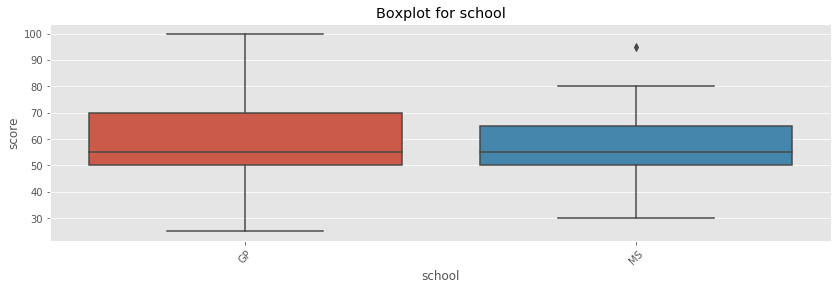

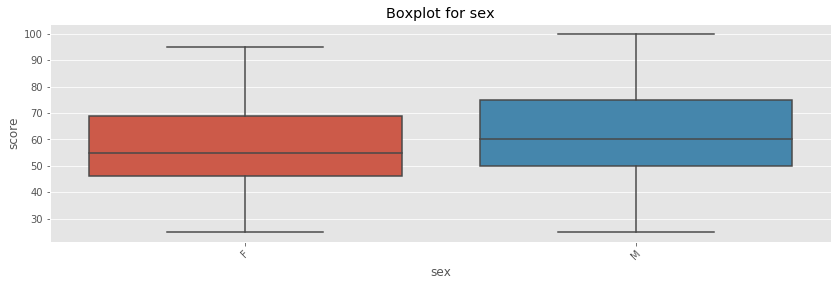

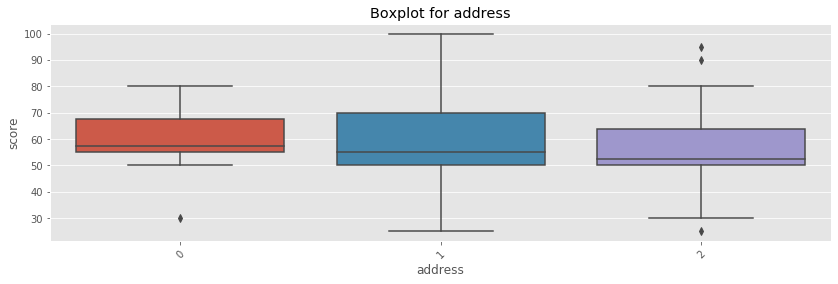

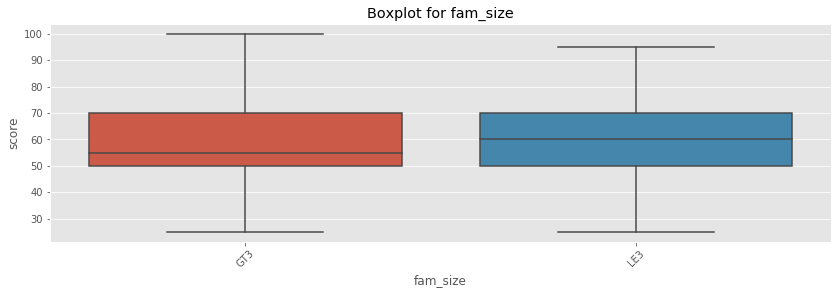

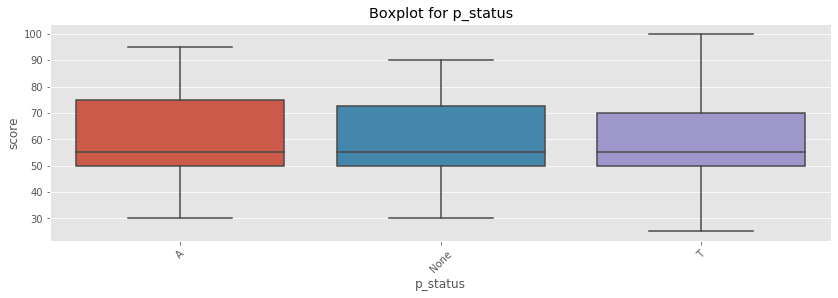

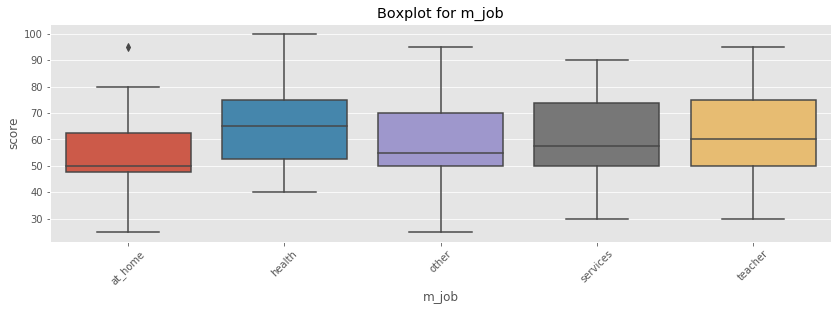

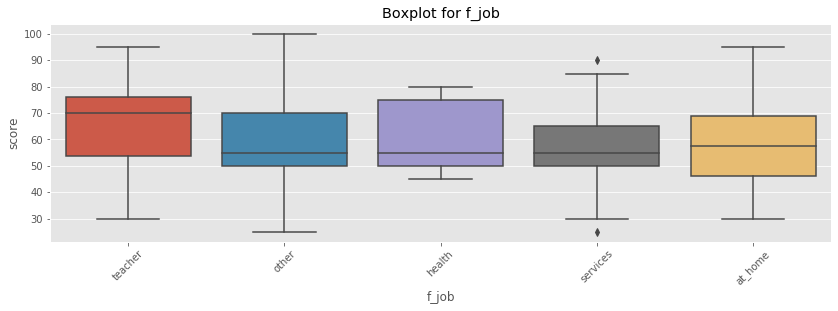

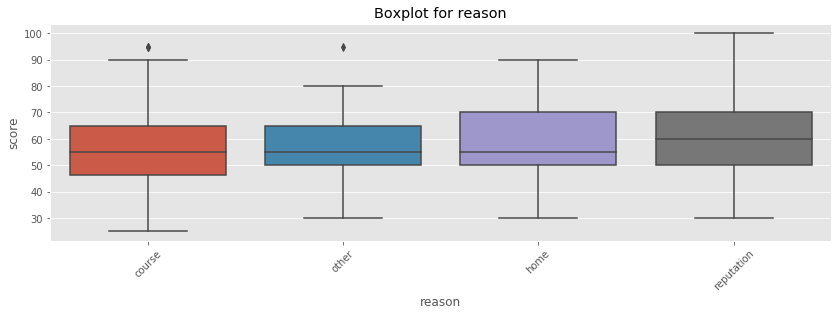

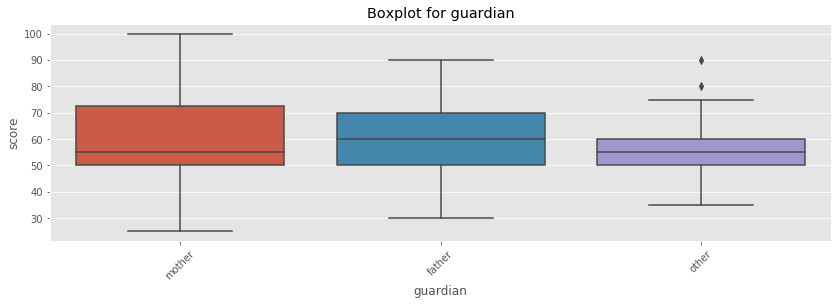

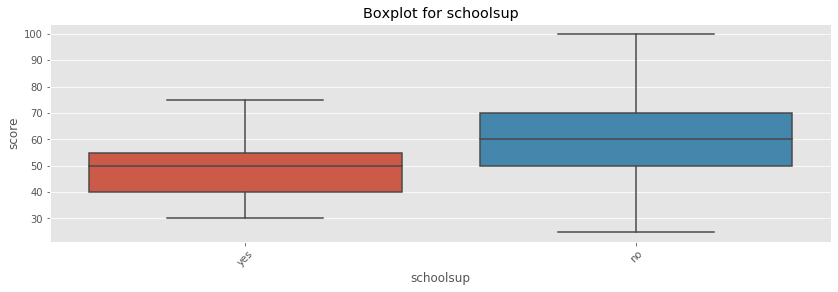

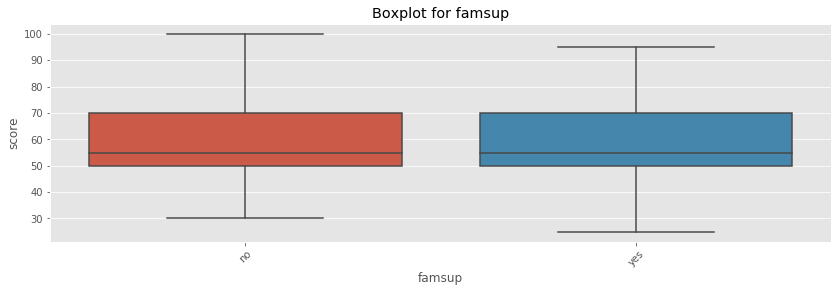

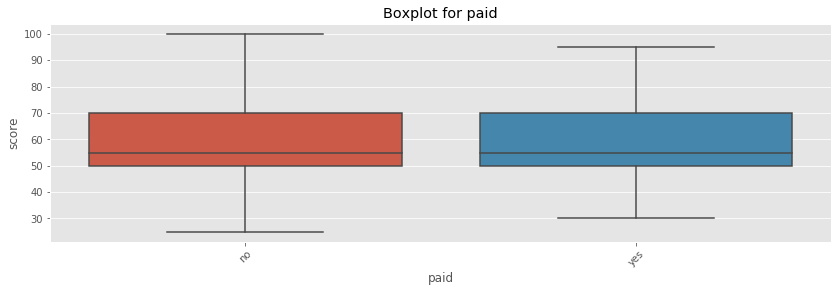

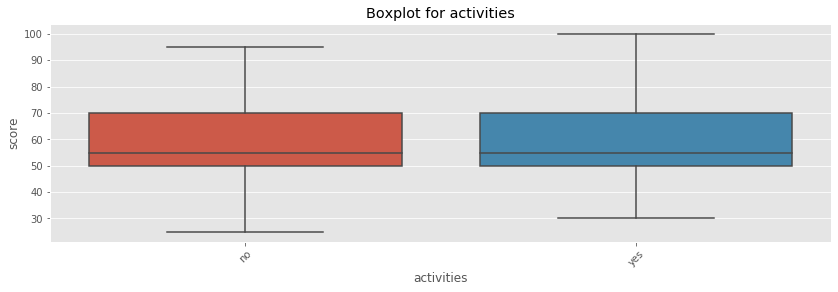

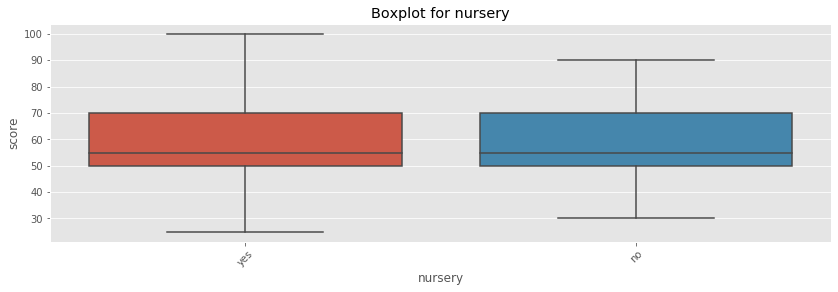

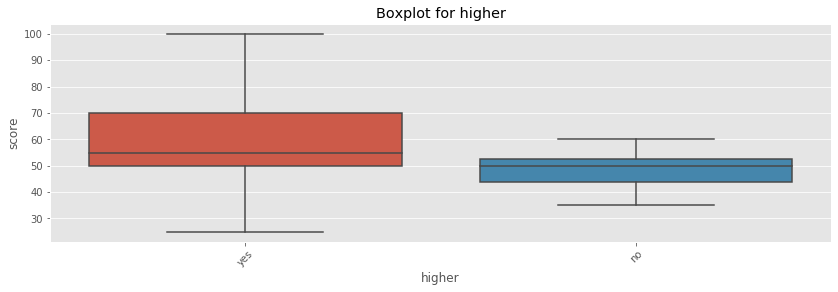

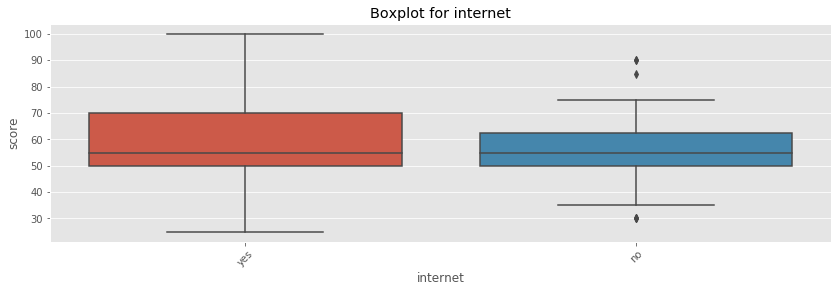

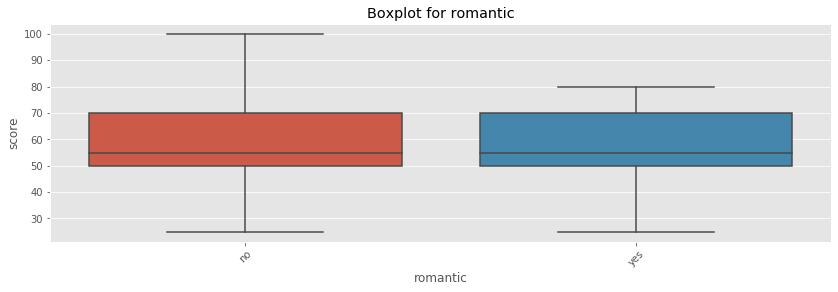

In [120]:
for col in ['school', 'sex', 'address', 'fam_size',
            'p_status', 'm_job', 'f_job', 'reason', 'guardian', 'schoolsup', 
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:

In [121]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [122]:
for col in ['school', 'sex', 'address', 'fam_size',
            'p_status', 'm_job', 'f_job', 'reason', 'guardian', 'schoolsup', 
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки schoolsup


Как мы видим, влияние на успех оказывают: sex; m_job; schoolsup.

Оставим эти переменные в датасете для дальнейшего построения модели.

In [123]:
stud

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_g,higher,internet,romantic,fam_rel,freetime,go_out,health,absences,score
0,GP,F,18,1,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,1,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,1,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,1,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,1,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,MS,F,18,2,GT3,T,4.0,4.0,teacher,at_home,reputation,mother,3.0,1.0,0.0,no,yes,yes,yes,yes,-3.0,yes,yes,yes,4.0,4.0,3.0,5.0,7.0,30.0
388,MS,F,18,1,LE3,T,3.0,1.0,teacher,services,course,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,3.0,4.0,1.0,0.0,40.0
391,MS,M,17,1,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
393,MS,M,18,2,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,yes,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [125]:
stud_for_model = stud.loc[:, ['sex', 'age', 'studytime', 'health', 'fam_rel', 'm_job', 'schoolsup']]
stud_for_model.head(10)

,sex,age,studytime,health,fam_rel,m_job,schoolsup
0,F,18,2.0,3.0,4.0,at_home,yes
1,F,17,2.0,3.0,5.0,at_home,no
2,F,15,2.0,3.0,4.0,at_home,yes
3,F,15,3.0,5.0,3.0,health,no
4,F,16,2.0,5.0,4.0,other,no
5,M,16,2.0,5.0,5.0,services,no
6,M,16,2.0,3.0,4.0,other,no
7,F,17,2.0,1.0,4.0,other,yes
9,M,15,2.0,5.0,5.0,other,no
10,F,15,2.0,2.0,3.0,teacher,no


Выводы
Итак, в результате EDA для анализа влияния жизни детей на экзаменационную оценку были получены следующие выводы:

- В данных достаточно мало пустых значений, столбец p_status был меньше всех заполнен значениями.
- Выбросы найдены только в столбцах с экзаменационными результатами (score), (age) - возраст  и (absences) - пропущенные занятия, что позволяет сделать вывод о том, что данные достаточно чистые.
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это sex - пол; schoolsup — дополнительная образовательная поддержка, health - уровень здоровья, m_job - работа матери; studytime — время обучения; fam_rel — семейные отношения; age — возраст.